In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import os
import textwrap
import seaborn as sns

COLORS = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#f6bd60', '#e76f51', '#2a9d8f', "#c77dff", "#f7d6e0"]

rads = ["#ea5545", "#e1a692", "#DD7596", '#9A3B3B', "#b30000"]
maroon = ["#900c3f", "#c70039", '#900c3f']
COLORS_20 = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']
semi_balck = '#4F6272'


In [2]:
import matplotlib
plt.rcParams.update(matplotlib.rcParamsDefault)

In [3]:
results_path = "/Volumes/noamaz/modularity/xor/"
local_base_path = '/Users/noamazmon/PycharmProjects/network_modularity'
task_name = 'XOR'
task = "xor"
num_layers = "4"
time_str = dt.now().strftime("%Y-%m-%d-%H-%M-%S")
res_folder = f"{task}_{num_layers}_layers"
plot_path = f"{local_base_path}/plots/xor_multi_arch/{res_folder}"

In [4]:
first_analsis_res_folder = f"{results_path}/{res_folder}/first_analysis_results"
first_analsis_file_name = "2023-11-16-14-52-18_all_results_from_teach_archs_results_with_motifs_5000_ep_no_duplicates.csv"
lgbm_folder_name = 'exp_2023-11-16-17-38-02_nice_features'
n_features = 5

In [5]:
lgb_res_path = f"{results_path}/{res_folder}/lightgbm_feature_selection/{lgbm_folder_name}"
lgb_res_nn_path = f"{lgb_res_path}/teach_archs_regression_feature_selection_results"

In [7]:
corrlated_features_values = pd.read_csv(f"/Volumes/noamaz/modularity/xor/xor_4_layers/feature_correlation/2023-11-17-11-50-45_all_data.csv")
correlated_features_csv_name = '2023-11-17-11-50-45_feature_correlation.csv'
correlated_features = pd.read_csv(f"{results_path}/{res_folder}/feature_correlation/{correlated_features_csv_name}",
                                  index_col=0)


In [6]:
first_analsis = pd.read_csv(f"{first_analsis_res_folder}/{first_analsis_file_name}").rename(
    columns={'connectivity_ratio': 'density',
             }).sort_values('mean_performance', ascending=False)
first_analsis.shape

(103328, 29)

In [9]:
neurons_feature_names = [f'neurons_in_layer_{i}' for i in range(1, int(num_layers))]
dims = [f"{i}_{j}_{k}" for i, j, k in first_analsis[neurons_feature_names].values.tolist()]
dims.sort()
first_analsis['dims'] = dims

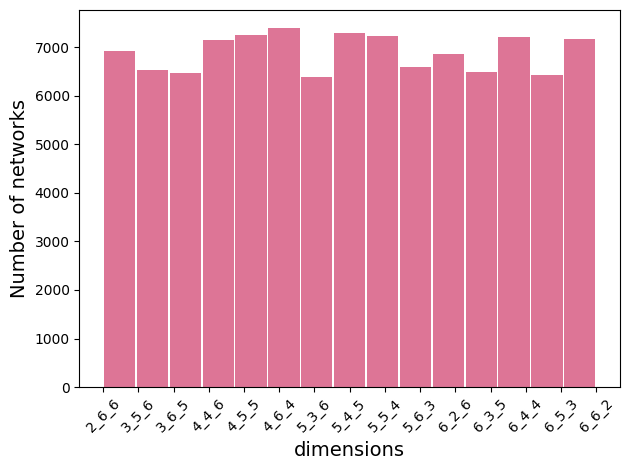

In [10]:
plt.hist(first_analsis['dims'], color=COLORS[2], bins=len(set(dims)), align='mid', rwidth=0.95)
plt.xticks(rotation=45)
plt.xlabel('dimensions', fontsize=14)
plt.ylabel('Number of networks', fontsize=14)
#axs[k].set_xlabel(f_name,  fontsize=14)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_dims_hist.png")
plt.show()

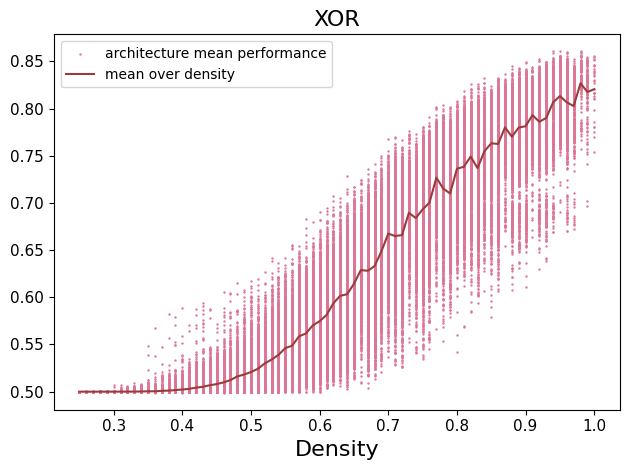

In [11]:
x_metric_name = 'density'
y_metric_name = 'mean_performance'

x_data = first_analsis[x_metric_name]
means_y = []
mean_x = []
for x in sorted(first_analsis[x_metric_name].unique()):
    means_y.append(first_analsis[y_metric_name][x_data == x].mean())
    mean_x.append(x)
#x_data = x_data + np.random.normal(-0.008, 0.008, x_data.shape[0])
plt.scatter(x_data, first_analsis[y_metric_name], c=COLORS[2], s=0.5, label='architecture mean performance')

plt.plot(mean_x, means_y, c=rads[3], label='mean over density')
plt.legend()
#plt.ylabel("Network's mean performance", fontsize=12)
plt.xlabel('Density', fontsize=16)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.title(
    f"{task.upper()}",
    wrap=True, fontsize=16)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_{y_metric_name}_vs_{x_metric_name}.png", dpi=300)
plt.show()

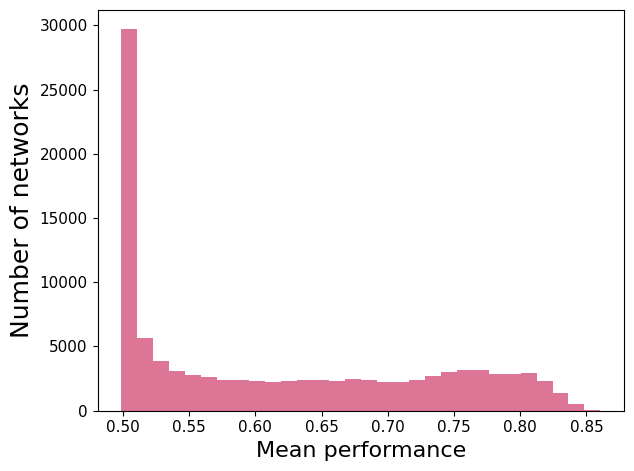

In [12]:
plt.hist(first_analsis['mean_performance'], color=COLORS[2], bins=30)
plt.xlabel('Mean performance', fontsize=16)
plt.ylabel('Number of networks', fontsize=18)
#plt.title(f"{task.upper()}", fontsize=14)
plt.tight_layout()
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.savefig(
    f"{plot_path}/{time_str}_{task}_mean_performance_hist.png")
plt.show()

In [20]:
selected_features_res = pd.read_csv(f"{lgb_res_path}/5_feature_values.csv").drop("Unnamed: 0", axis=1)

In [21]:
selected_feature_names = list(selected_features_res.columns)[:-1]

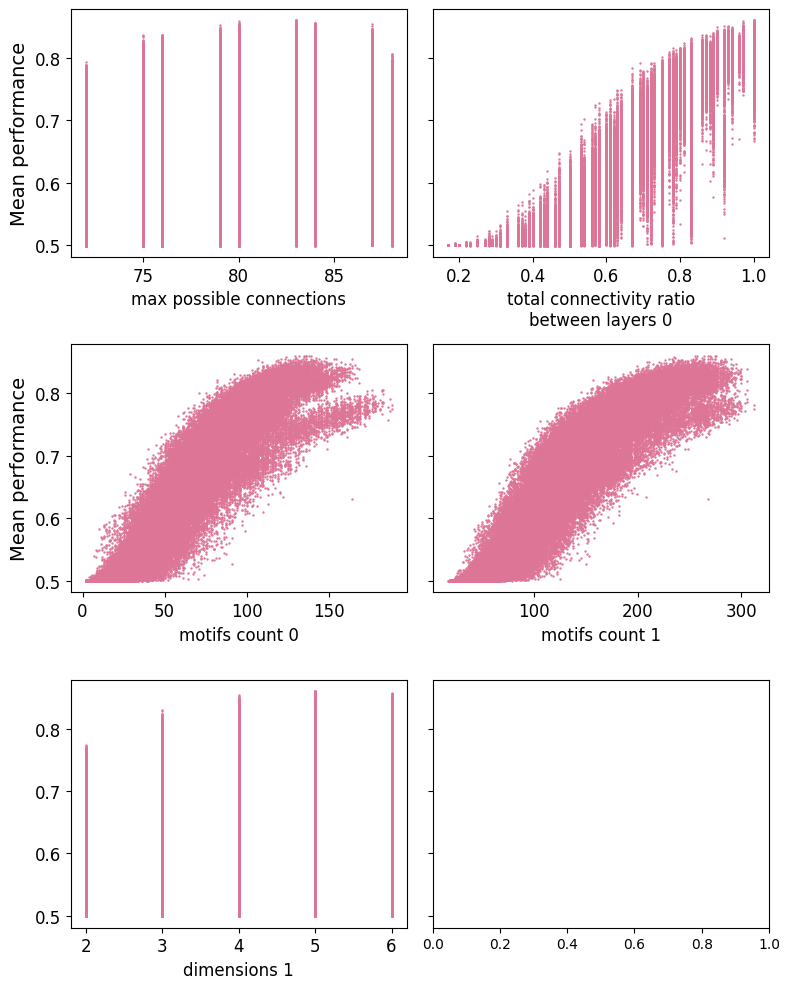

In [25]:
num_columns = int(np.ceil(len(selected_feature_names) / 2))
fig, axs = plt.subplots(num_columns, 2, figsize=(8, 10), sharey='all')
min_x = 1.0
max_x = 0
idxs = []
r, c, = axs.shape
for i in range(r):
    for j in range(c):
        idxs.append((i, j))
for k, (f_name, (i, j)) in enumerate(zip(selected_feature_names, idxs)):
    x_data = selected_features_res[f_name]
    # if  len(set(res[f_name])) < 15:
    #     x_data = x_data + np.random.normal(-0.1, 0.1, len(x_data))
    axs[i, j].scatter(x_data, selected_features_res['label'], color=COLORS[2], s=0.5)
    if 'per_input' in f_name:
        neuron = f_name.split('(')[1].split(' ')[1].split(')')[0]
        f_name = f_name.split('(')[0].replace('num', '#') + neuron
    axs[i, j].set_xlabel(textwrap.fill(f_name.replace('_', ' '), width=30,
                                       break_long_words=False), fontsize=12)
    #axs[i, j].set_title(f"{name}", wrap=True)
    #axs[i, j].set_ylim(0,1)
    axs[i, j].tick_params(axis='x', labelsize=12)
    axs[i, j].tick_params(axis='y', labelsize=12)
axs[1, 0].set_ylabel(f"Mean performance", fontsize=14)
axs[0, 0].set_ylabel(f"Mean performance", fontsize=14)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_5_fetaures_dist.png")
plt.show()

In [65]:
for file in os.listdir(f"{results_path}/{res_folder}/lightgbm_feature_selection/{lgbm_folder_name}"):
    if 'feature_selectio' in file:
        feature_selection = pd.read_csv(f"{first_analsis_res_folder}/{first_analsis_file_name}")
lgb_res_nn_path = f"{results_path}/{res_folder}/lightgbm_feature_selection/{lgbm_folder_name}/teach_archs_regression_feature_selection_results"
num_features = []
feature_selection_res = pd.DataFrame()
for file_name in os.listdir(lgb_res_nn_path):
    if 'best.csv' not in file_name:
        continue
    temp = pd.read_csv(f"{lgb_res_nn_path}/{file_name}")
    temp['num_features'] = int(file_name.split('only_')[1].split('_features')[0])
    feature_selection_res = pd.concat([feature_selection_res, temp], ignore_index=True)
feature_selection_res = feature_selection_res.sort_values('num_features')

In [66]:
feature_selection_res

,Unnamed: 0,best ephoc,best mape train,best mape test,best mse train,best mse test,best r2 train,best r2 test,num_features
22,0,312,0.036640,0.035429,0.000033,0.000033,0.911837,0.915865,1
9,0,479,0.036393,0.035427,0.000033,0.000033,0.912314,0.915873,1
16,0,418,0.029053,0.028508,0.000026,0.000026,0.944002,0.946770,2
1,0,458,0.027150,0.025706,0.000024,0.000024,0.952855,0.955542,3
11,0,483,0.024075,0.022769,0.000022,0.000022,0.962050,0.963300,4
6,0,371,0.020073,0.019090,0.000018,0.000018,0.974152,0.975247,5
10,0,476,0.019737,0.018867,0.000018,0.000018,0.974782,0.975232,5
18,0,494,0.019599,0.018850,0.000018,0.000018,0.974836,0.975305,5
2,0,445,0.020196,0.019105,0.000018,0.000018,0.973862,0.974907,6
20,0,478,0.019588,0.018582,0.000017,0.000017,0.975627,0.976709,7


In [60]:
max_features_mape =feature_selection_res['best mape test'][feature_selection_res['num_features'] == feature_selection_res['num_features'].max()].item()
feature_selection_res['mape_ratio_min'] = feature_selection_res['best mape test'].min() / feature_selection_res['best mape test']
feature_selection_res['r2_ratio_max'] =  feature_selection_res['best r2 test'] / feature_selection_res['best r2 test'].max()

feature_selection_res['mape_ops_ratio_min'] = feature_selection_res['best mape test'] / feature_selection_res['best mape test'].min()
feature_selection_res['mape_ratio'] = max_features_mape / feature_selection_res['best mape test']
feature_selection_res['mape_ops_ratio'] = feature_selection_res['best mape test'] / max_features_mape
feature_selection_res[['mape_ratio', 'mape_ops_ratio', 'mape_ratio_min', 'mape_ops_ratio_min','best mape test','best r2 test', 'r2_ratio_max', 'num_features']]

,mape_ratio,mape_ops_ratio,mape_ratio_min,mape_ops_ratio_min,best mape test,best r2 test,r2_ratio_max,num_features
21,0.323291,3.093191,0.314239,3.182288,0.035429,0.915865,0.923006,1
8,0.323309,3.093014,0.314257,3.182106,0.035427,0.915873,0.923015,1
15,0.401781,2.488917,0.390532,2.560608,0.028508,0.946770,0.954152,2
1,0.445573,2.244301,0.433098,2.308947,0.025706,0.955542,0.962993,3
10,0.503045,1.987892,0.488961,2.045153,0.022769,0.963300,0.970811,4
9,0.607089,1.647204,0.590092,1.694651,0.018867,0.975232,0.982836,5
17,0.607639,1.645715,0.590626,1.693119,0.018850,0.975305,0.982910,5
2,0.599513,1.668021,0.582728,1.716067,0.019105,0.974907,0.982509,6
19,0.616393,1.622342,0.599135,1.669073,0.018582,0.976709,0.984325,7
11,0.638086,1.567186,0.620221,1.612328,0.017950,0.978074,0.985701,8


In [ ]:
feature_selection_res['best mape test'][feature_selection_res['best mape test'] ==feature_selection_res['best mape test'].min()].item()

In [29]:

print(round(feature_selection_res['best mape test'].min(), 4))
print(round(feature_selection_res['best r2 test'].max(), 4))

feature_selection_res[feature_selection_res['num_features'].isin((5,40,90))][[
    'mape_ratio_min',
    'best mape test',
        'best mape train',
    'best r2 test',
        'best r2 train',
    'r2_ratio_max',
    'num_features',
]]

0.0111
0.9923


,mape_ratio_min,best mape test,best mape train,best r2 test,best r2 train,r2_ratio_max,num_features
9,0.590092,0.018867,0.019737,0.975232,0.974782,0.982836,5
12,0.982565,0.011331,0.010703,0.991956,0.993243,0.999691,40
7,1.000000,0.011133,0.009686,0.992235,0.994350,0.999972,90


In [61]:
0.0111/0.1885

0.05888594164456234

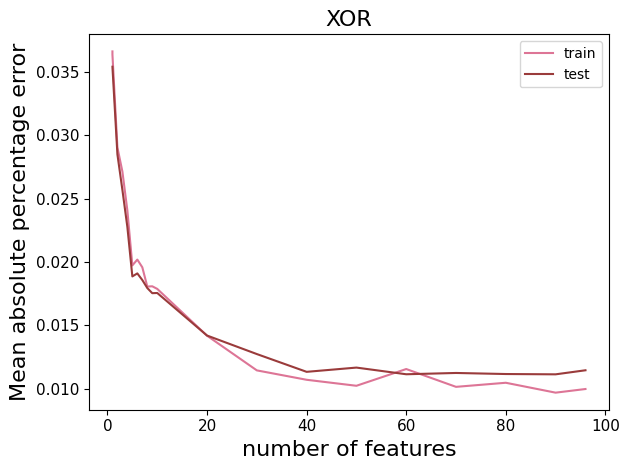

In [18]:
plt.figure()
plt.plot(feature_selection_res['num_features'], feature_selection_res['best mape train'], label='train', c=rads[2])
plt.plot(feature_selection_res['num_features'], feature_selection_res['best mape test'], label='test', c=rads[3])

plt.xlabel('number of features', fontsize=16)
plt.ylabel(f'Mean absolute percentage error', fontsize=16)
plt.legend()
plt.title(
    f"{task.upper()}",
    wrap=True, fontsize=16)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_nn_feature_selection_r2_mape.png")
plt.show()

In [8]:

glob_inds = []
feature_selection_res_by_glob = pd.DataFrame()
for folder_name in os.listdir(f"{results_path}/{res_folder}/lightgbm_feature_selection/by_globality"):
    if 'glob' not in folder_name:
        continue
    glob_ind = folder_name.split('glob_')[1].replace('_', '.')
    glob_inds.append(glob_ind)
    lgb_res_nn_path = f"{results_path}/{res_folder}/lightgbm_feature_selection/by_globality/{folder_name}/teach_archs_regression_feature_selection_results"
    for file_name in os.listdir(lgb_res_nn_path):
        if 'best.csv' not in file_name:
            continue
        temp = pd.read_csv(f"{lgb_res_nn_path}/{file_name}")
        temp['num_features'] = int(file_name.split('only_')[1].split('_features')[0])
        temp['glob_ind'] = glob_ind
        feature_selection_res_by_glob = pd.concat([feature_selection_res_by_glob, temp], ignore_index=True)
feature_selection_res_by_glob = feature_selection_res_by_glob.sort_values(['glob_ind', 'num_features'])

/var/folders/gp/pmfbgzrs0d53zz73ftvp7sg80000gn/T/ipykernel_56970/1953574858.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  res_per_glob = feature_selection_res_by_glob[feature_selection_res_by_glob['glob_ind']==ind][feature_selection_res_by_glob['num_features']<=10]


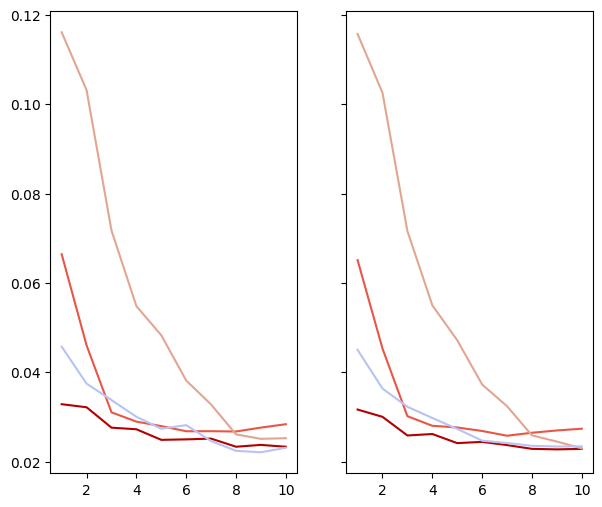

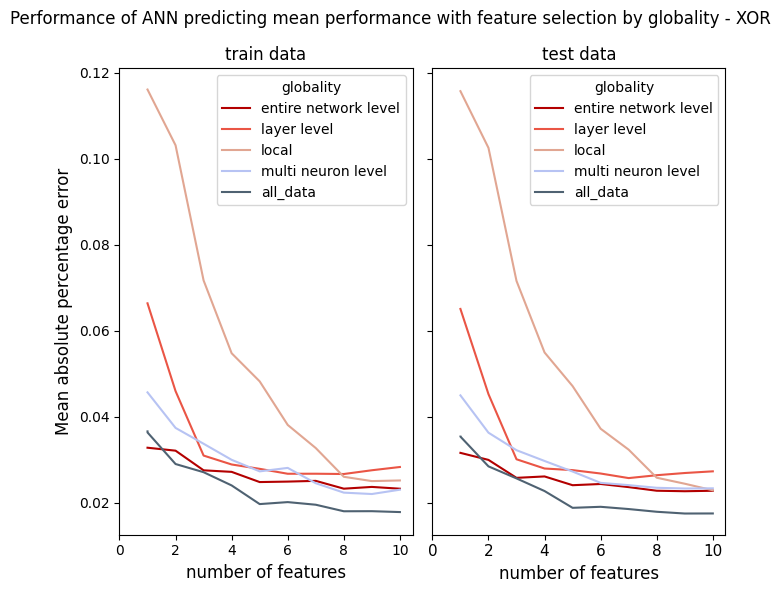

In [11]:
glob_levels = {
    1: "entire network level",
    0.75: "layer level",
    0.5: "multi neuron level",
    0: "local"
}
rads_blues =  ["#b30000", "#ea5545", "#e1a692", COLORS[1],  ]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 6), sharex='all', sharey='all')
for i, ind in enumerate(glob_inds[::-1]):
    res_per_glob = feature_selection_res_by_glob[feature_selection_res_by_glob['glob_ind']==ind][feature_selection_res_by_glob['num_features']<=10]
    ax1.plot(res_per_glob['num_features'], res_per_glob['best mape train'], label=f"{glob_levels[float(ind)]}", c=rads_blues[i])
    ax2.plot(res_per_glob['num_features'], res_per_glob['best mape test'], label=f"{glob_levels[float(ind)]}", c=rads_blues[i])
small_all_fetaures_selcetion = feature_selection_res[feature_selection_res['num_features']<=10]
ax1.plot(small_all_fetaures_selcetion['num_features'], small_all_fetaures_selcetion['best mape train'], label="all_data", c=semi_balck)
ax2.plot(small_all_fetaures_selcetion['num_features'], small_all_fetaures_selcetion['best mape test'], label="all_data", c=semi_balck)
ax1.set_xlabel('number of features', fontsize=12)
ax1.set_ylabel(f'Mean absolute percentage error', fontsize=12)
ax2.set_xlabel('number of features', fontsize=12)
ax1.set_xticks(np.arange(small_all_fetaures_selcetion.shape[0]+1)[::2])
ax2.set_xticks(np.arange(small_all_fetaures_selcetion.shape[0]+1)[::2])

#ax2.set_ylabel(f'Mean absolute percentage error', fontsize=12)
ax1.legend(title='globality')
ax2.legend(title='globality')
ax1.set_title('train data')
ax2.set_title('test data')
plt.suptitle(
    f"Performance of ANN predicting mean performance with feature selection by globality - {task.upper()}",
    wrap=True, fontsize=12)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.tight_layout()
ax1.grid(False)
ax2.grid(False)

plt.savefig(
    f"{plot_path}/{time_str}_{task}_nn_feature_selection_r2_mape.png")
plt.show()

/var/folders/gp/pmfbgzrs0d53zz73ftvp7sg80000gn/T/ipykernel_56970/2381815300.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  res_per_glob = feature_selection_res_by_glob[feature_selection_res_by_glob['glob_ind']==ind][feature_selection_res_by_glob['num_features']<=50]


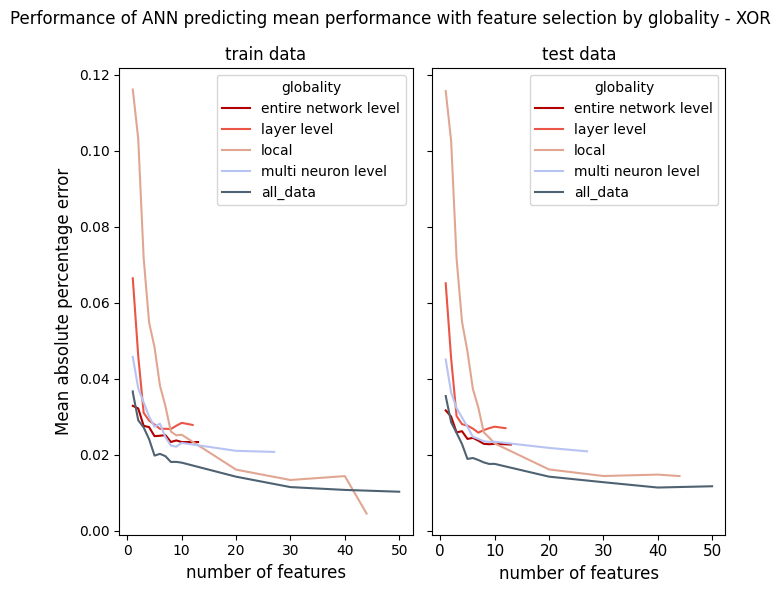

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 6), sharex='all', sharey='all')
for i, ind in enumerate(glob_inds[::-1]):
    res_per_glob = feature_selection_res_by_glob[feature_selection_res_by_glob['glob_ind']==ind][feature_selection_res_by_glob['num_features']<=50]
    ax1.plot(res_per_glob['num_features'], res_per_glob['best mape train'], label=f"{glob_levels[float(ind)]}", c=rads_blues[i])
    ax2.plot(res_per_glob['num_features'], res_per_glob['best mape test'], label=f"{glob_levels[float(ind)]}", c=rads_blues[i])
small_all_fetaures_selcetion = feature_selection_res[feature_selection_res['num_features']<=50]
ax1.plot(small_all_fetaures_selcetion['num_features'], small_all_fetaures_selcetion['best mape train'], label="all_data", c=semi_balck)
ax2.plot(small_all_fetaures_selcetion['num_features'], small_all_fetaures_selcetion['best mape test'], label="all_data", c=semi_balck)
ax1.set_xlabel('number of features', fontsize=12)
ax1.set_ylabel(f'Mean absolute percentage error', fontsize=12)
ax2.set_xlabel('number of features', fontsize=12)

#ax2.set_ylabel(f'Mean absolute percentage error', fontsize=12)
ax1.legend(title='globality')
ax2.legend(title='globality')
ax1.set_title('train data')
ax2.set_title('test data')
plt.suptitle(
    f"Performance of ANN predicting mean performance with feature selection by globality - {task.upper()}",
    wrap=True, fontsize=12)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.tight_layout()
ax1.grid(False)
ax2.grid(False)

plt.savefig(
    f"{plot_path}/{time_str}_{task}_nn_feature_selection_r2_mape_full.png")
plt.show()

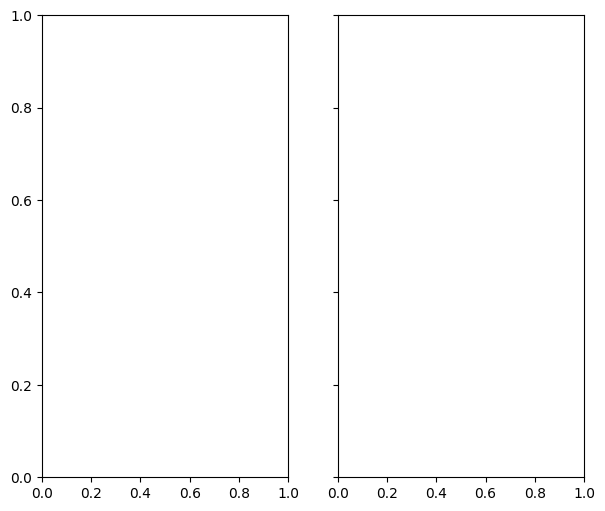

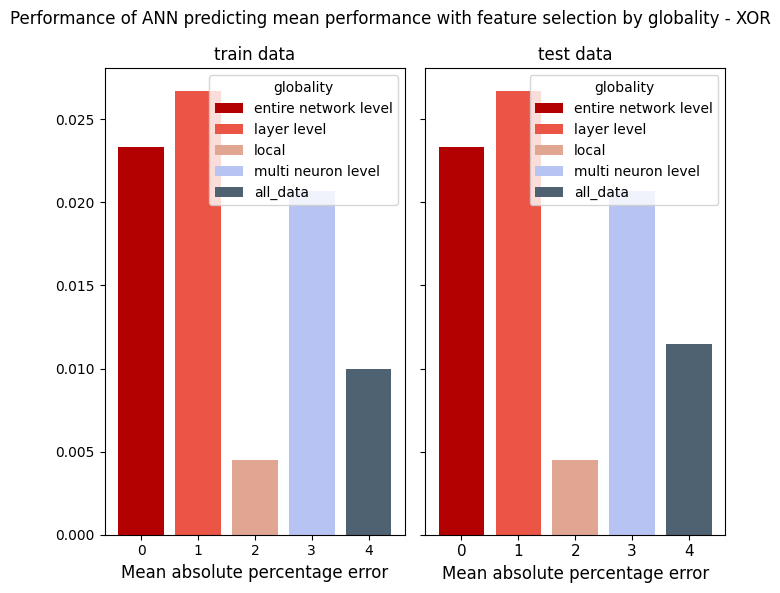

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 6), sharex='all', sharey='all')
for i, ind in enumerate(glob_inds[::-1]):
    res_per_glob = feature_selection_res_by_glob[feature_selection_res_by_glob['glob_ind']==ind]
    ax1.bar(x = i, height=res_per_glob['best mape train'].min(), label=f"{glob_levels[float(ind)]}", color=rads_blues[i])
    ax2.bar(x=i,height=res_per_glob['best mape train'].min(), label=f"{glob_levels[float(ind)]}", color=rads_blues[i])
small_all_fetaures_selcetion = feature_selection_res[feature_selection_res['num_features']==feature_selection_res['num_features'].max()]
ax1.bar(x=i+1,height=small_all_fetaures_selcetion['best mape train'], label="all_data", color=semi_balck)
ax2.bar(x=i+1,height=small_all_fetaures_selcetion['best mape test'], label="all_data", color=semi_balck)
ax1.set_xlabel('number of features', fontsize=12)
ax1.set_xlabel(f'Mean absolute percentage error', fontsize=12)
ax2.set_xlabel(f'Mean absolute percentage error', fontsize=12)

#ax2.set_ylabel(f'Mean absolute percentage error', fontsize=12)
ax1.legend(title='globality')
ax2.legend(title='globality')
ax1.set_title('train data')
ax2.set_title('test data')
plt.suptitle(
    f"Performance of ANN predicting mean performance with feature selection by globality - {task.upper()}",
    wrap=True, fontsize=12)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.tight_layout()
ax1.grid(False)
ax2.grid(False)

plt.savefig(
    f"{plot_path}/{time_str}_{task}_nn_feature_selection_r2_mape_full_hist.png")
plt.show()

In [11]:
model_res_path = f"{results_path}/{res_folder}/lightgbm_feature_selection/{lgbm_folder_name}"
res_pred_vs_label = pd.read_csv(f"{model_res_path}/{n_features}_prediction_results.csv")


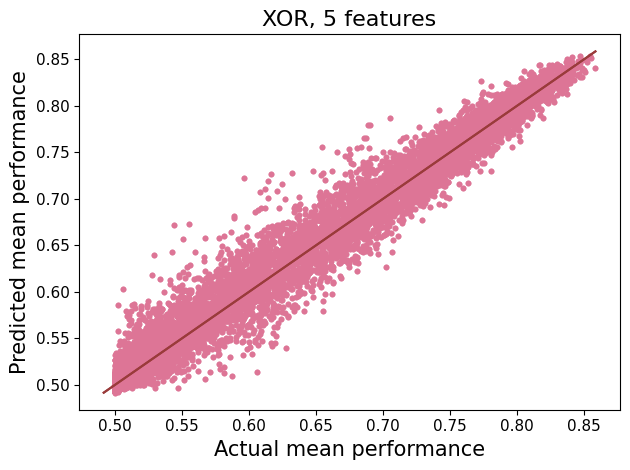

In [15]:
plt.scatter(res_pred_vs_label['test_label'], res_pred_vs_label['test_pred'], c=COLORS[2], s=10)
start = min(res_pred_vs_label['test_label'].min(), res_pred_vs_label['test_pred'].min())
stop = max(res_pred_vs_label['test_label'].max(), res_pred_vs_label['test_pred'].max())
plt.plot(np.linspace(start, stop, 50), np.linspace(start, stop, 50), c=rads[3])
plt.ylabel('Predicted mean performance', fontsize=15)
plt.xlabel('Actual mean performance', fontsize=15)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.title(
    f"{task.upper()}, {n_features} features",
    wrap=True, fontsize=16)
plt.tight_layout()

plt.savefig(f"{plot_path}/{time_str}_nn_model_pred_vs_actual.png")
plt.show()

In [32]:
fetureas = [90, 40, 5]
model_res_path = f"{results_path}/{res_folder}/lightgbm_feature_selection/{lgbm_folder_name}/{fetureas[2]}_prediction_results.csv"
model_prediction_res = pd.read_csv(model_res_path)
model_res_path_sat = f"{results_path}/{res_folder}/lightgbm_feature_selection/{lgbm_folder_name}/{fetureas[1]}_prediction_results.csv"
model_prediction_res_set = pd.read_csv(model_res_path_sat)
model_res_path_max = f"{results_path}/{res_folder}/lightgbm_feature_selection/{lgbm_folder_name}/{fetureas[0]}_prediction_results.csv"
model_prediction_res_max = pd.read_csv(model_res_path_max)

<Figure size 640x480 with 0 Axes>

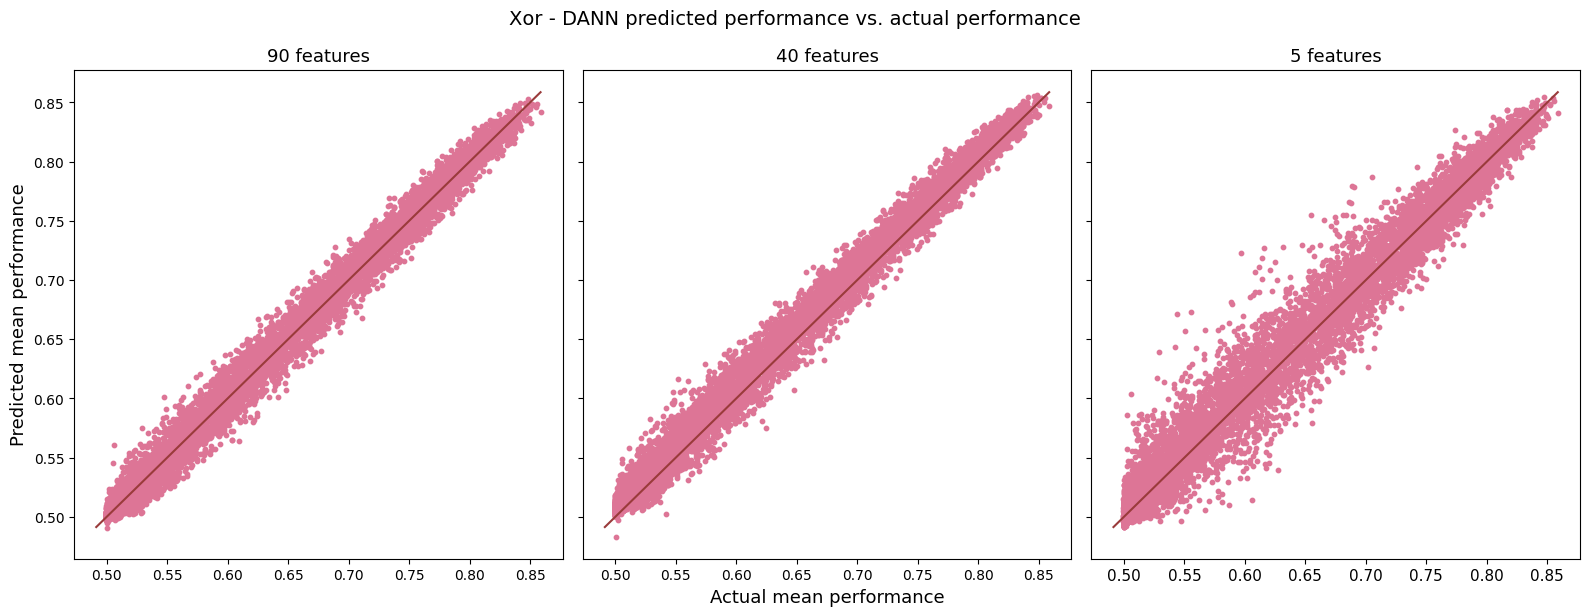

In [34]:
models =  (model_prediction_res_max, model_prediction_res_set, model_prediction_res)
start = min(min( model_prediction_res['test_label'].min(), model_prediction_res['test_pred'].min()) for model in models)
stop = max(max( model_prediction_res['test_label'].max(), model_prediction_res['test_pred'].max()) for model in models)
plt.figure()
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,9), sharex='all', sharey='all',)

for ax, model, num_fet in zip((ax1, ax2, ax3),models, fetureas):
    ax.scatter(model['test_label'], model['test_pred'], s=10, c=COLORS[2])
    ax.set_box_aspect(1)
    ax.plot(np.linspace(start, stop, 50), np.linspace(start, stop, 50), c=rads[3])
    ax.set_title(
    f"{num_fet} features",
    wrap=True, fontsize=13)

ax1.set_ylabel('Predicted mean performance', fontsize=13)
ax2.set_xlabel('Actual mean performance', fontsize=13)

plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.tight_layout()
plt.suptitle(f"{task.capitalize()} - DANN predicted performance vs. actual performance" ,y=0.82,wrap=True, fontsize=14)
plt.tight_layout()

plt.savefig(f"{plot_path}/{time_str}_nn_model_pred_vs_actual_max_6.png")
plt.show()

In [62]:
def abs_percentage_error(A, F):
    abs_errors = [
        abs((a-f)/a)
    for a, f in zip(A, F)
    ]
    return np.mean(abs_errors), np.var(abs_errors)


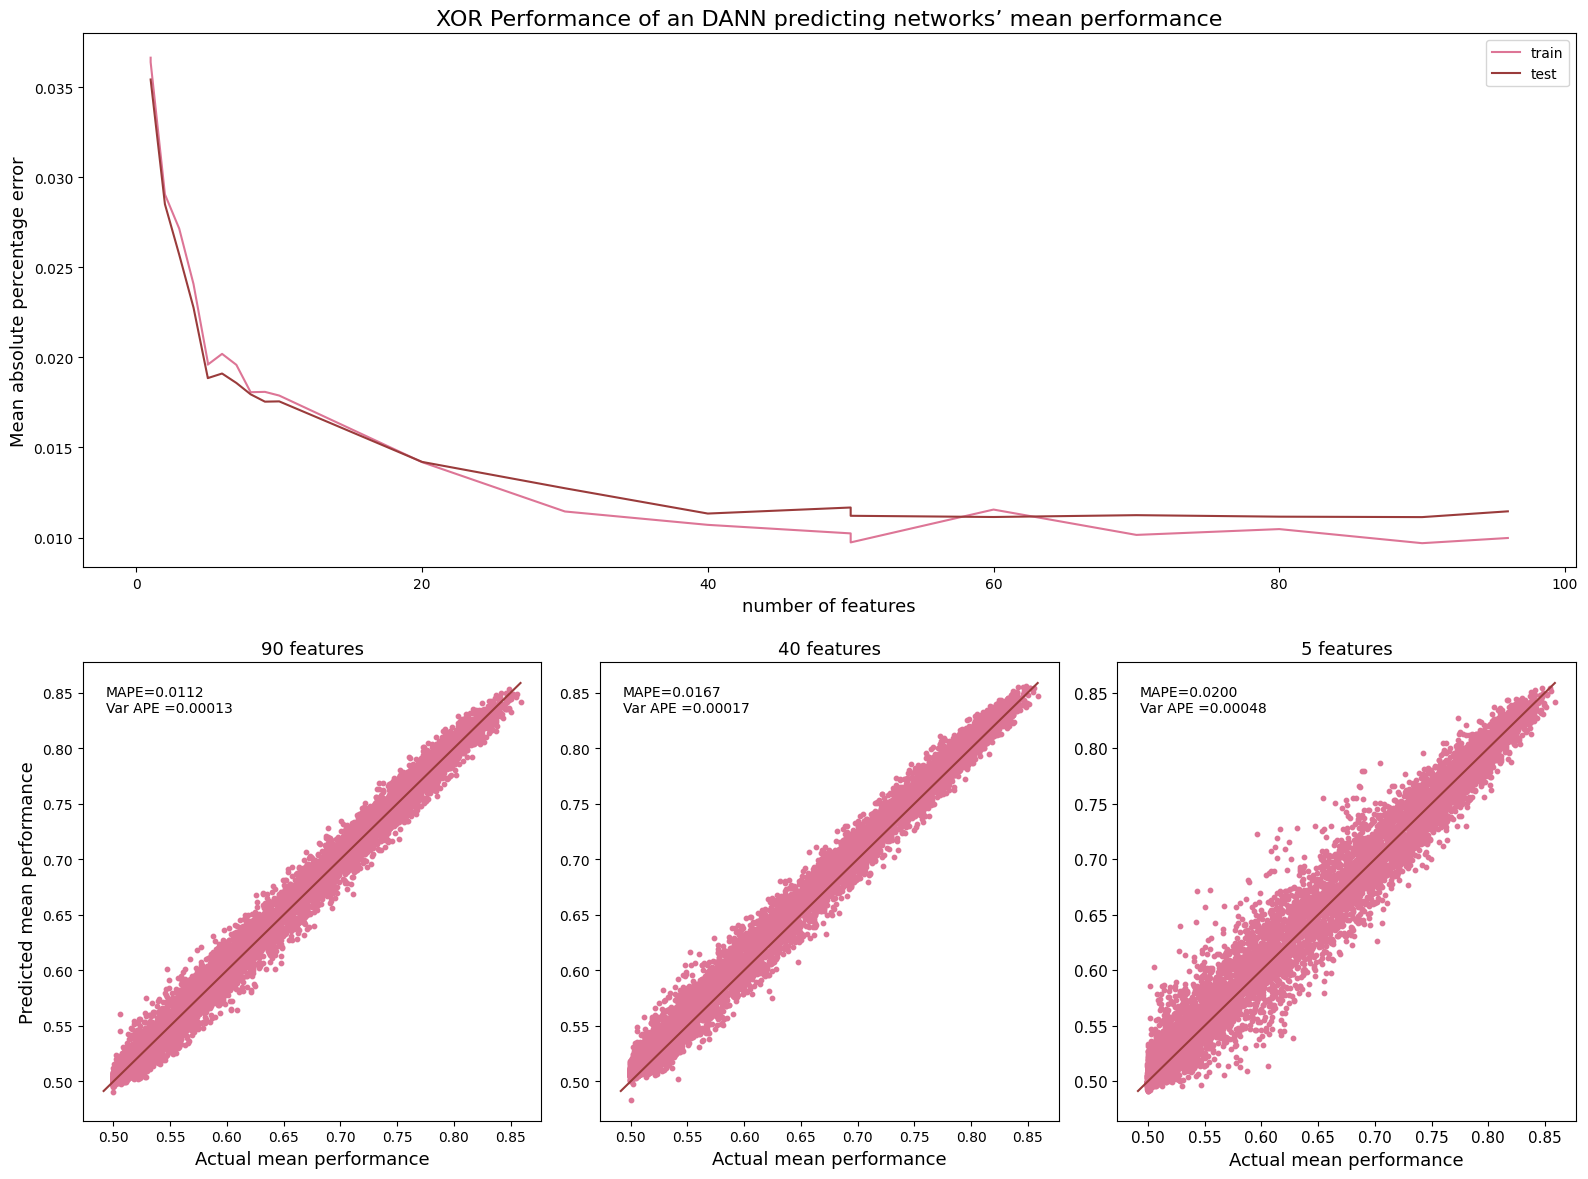

In [63]:
models =  (model_prediction_res_max, model_prediction_res_set, model_prediction_res)
start = min(min( model_prediction_res['test_label'].min(), model_prediction_res['test_pred'].min()) for model in models)
stop = max(max( model_prediction_res['test_label'].max(), model_prediction_res['test_pred'].max()) for model in models)
fig = plt.figure(figsize=(16,12))
ax0 = fig.add_subplot(211)
ax1 = fig.add_subplot(234)
ax2 = fig.add_subplot(235,  sharex=ax1, sharey=ax1 )
ax3 = fig.add_subplot(236,  sharex=ax1, sharey=ax1 )

for ax, model, num_fet in zip((ax1, ax2, ax3),models, fetureas):
    ax.scatter(model['test_label'], model['test_pred'], s=10, c=COLORS[2])
    ax.set_box_aspect(1)
    mape, var = abs_percentage_error(model['test_label'], model['test_pred'])
    textstr = '\n'.join((
        r'MAPE=%.4f' % (mape),
        r'Var APE =%.5f' % (var)))
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='top', )
    ax.plot(np.linspace(start, stop, 50), np.linspace(start, stop, 50), c=rads[3])
    ax.set_title(
    f"{num_fet} features",
    wrap=True, fontsize=13)
    ax.set_xlabel('Actual mean performance', fontsize=13)

ax1.set_ylabel('Predicted mean performance', fontsize=13)

plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
#plt.suptitle(f"{task.capitalize()} - DANN predicted performance vs. actual performance" ,wrap=True, fontsize=14)

ax0.plot(feature_selection_res['num_features'], feature_selection_res['best mape train'], label='train', c=rads[2])
ax0.plot(feature_selection_res['num_features'], feature_selection_res['best mape test'], label='test', c=rads[3])

ax0.set_xlabel('number of features', fontsize=13)
ax0.set_ylabel(f'Mean absolute percentage error', fontsize=13)
ax0.legend()
ax0.set_title(
    f"{task.upper()} Performance of an DANN predicting networks’ mean performance",
    wrap=True, fontsize=16)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_nn_feature_selection_r2_mape.png")
plt.show()

In [64]:
0.0112/0.200

0.055999999999999994

In [27]:

baseline_path = f"{results_path}/{res_folder}/random_feature_selection/{n_features}_features/teach_archs_regression_random_feature_selection_results"
res_baseline = pd.DataFrame()
for file_name in os.listdir(baseline_path):
    if '_output_best.csv' not in file_name:
        continue
    temp = pd.read_csv(f"{baseline_path}/{file_name}")
    res_baseline = pd.concat([res_baseline, temp], ignore_index=True)

In [28]:
globality_path = f"{results_path}/{res_folder}/feature_globality/{n_features}_features/teach_archs_regression_feature_selection_results"
globality_baseline_res = pd.DataFrame()
for file_name in os.listdir(globality_path):
    if '_output_best.csv' not in file_name:
        continue
    temp = pd.read_csv(f"{globality_path}/{file_name}")
    temp['exp_name'] = file_name.split('.csv')[0]
    globality_baseline_res = pd.concat([globality_baseline_res, temp], ignore_index=True)

In [29]:
globality_baseline_res

,Unnamed: 0,best ephoc,best mape train,best mape test,best mse train,best mse test,best r2 train,best r2 test,exp_name
0,0,475,0.026860,0.025803,0.000024,0.000024,0.952038,0.954711,xor_2023-11-17-12-57-33_5_features_37_lr_0.001...
1,0,483,0.024599,0.024559,0.000023,0.000022,0.958496,0.960189,xor_2023-11-17-13-08-49_5_features_181_lr_0.00...
2,0,465,0.025145,0.024033,0.000023,0.000023,0.957058,0.959240,xor_2023-11-17-12-57-40_5_features_106_lr_0.00...
3,0,474,0.025120,0.024337,0.000023,0.000023,0.956923,0.958468,xor_2023-11-17-12-57-46_5_features_77_lr_0.001...
4,0,378,0.024420,0.023489,0.000023,0.000022,0.959137,0.960778,xor_2023-11-17-12-57-33_5_features_38_lr_0.001...
...,...,...,...,...,...,...,...,...,...
305,0,490,0.024145,0.024204,0.000022,0.000022,0.960583,0.961620,xor_2023-11-17-12-58-17_5_features_87_lr_0.001...
306,0,432,0.023467,0.023022,0.000022,0.000021,0.962524,0.963964,xor_2023-11-17-13-10-48_5_features_239_lr_0.00...
307,0,405,0.025889,0.024561,0.000024,0.000023,0.955111,0.957388,xor_2023-11-17-12-57-40_5_features_25_lr_0.001...
308,0,485,0.024412,0.023920,0.000022,0.000022,0.960209,0.961804,xor_2023-11-17-13-10-46_5_features_238_lr_0.00...


In [30]:
f_selction = feature_selection_res['best mape test'][feature_selection_res['num_features'] == n_features].item()
threshold = round(f_selction, 3)
globality_baseline_res[globality_baseline_res['best mape test']<=threshold]

,Unnamed: 0,best ephoc,best mape train,best mape test,best mse train,best mse test,best r2 train,best r2 test,exp_name


In [31]:
correlated_path = f"{results_path}/{res_folder}/feature_correlation/{n_features}_features"
for file_name in os.listdir(correlated_path):
    if '_output_best.csv' not in file_name:
        continue
    res_corr = pd.read_csv(f"{correlated_path}/{file_name}")

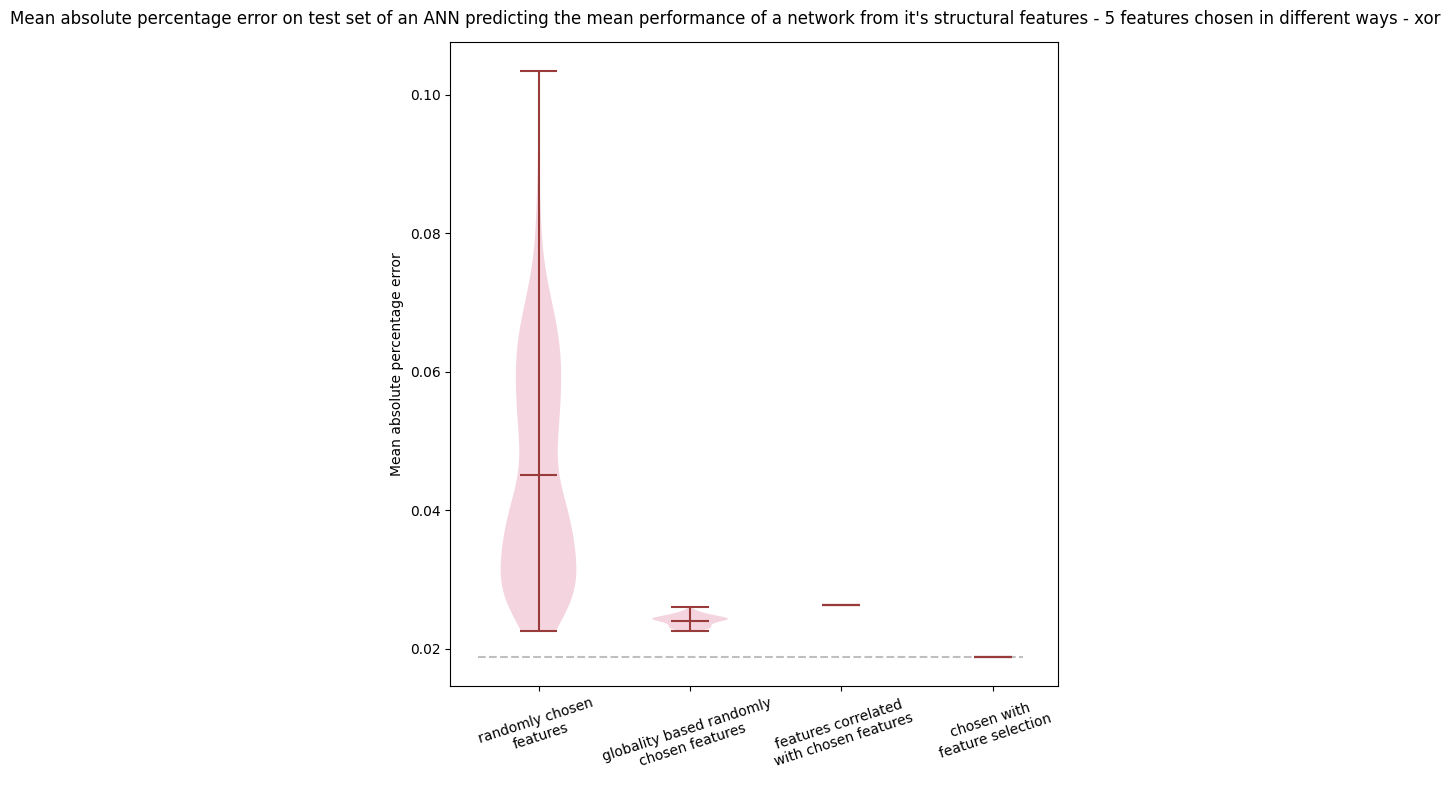

In [32]:
all_data = [
    res_baseline['best mape test'],
    globality_baseline_res['best mape test'],
    res_corr['best mape test'],
    feature_selection_res['best mape test'][feature_selection_res['num_features'] == n_features],
]
labels = [
    'randomly chosen\nfeatures',
    'globality based randomly\nchosen features',
    'features correlated\nwith chosen features',
    'chosen with\nfeature selection',
]
plt.figure(figsize=(7, 8), )
plt.hlines(y=feature_selection_res['best mape test'][feature_selection_res['num_features'] == n_features], xmin=0.6,
           xmax=len(all_data) + 0.2, colors='grey', linestyles='--', alpha=0.5,
           label='features correlated with chosen features')
parts = plt.violinplot(all_data,
                       vert=True,
                       showmeans=True,
                       # vertical box alignment
                       #labels=labels
                       )
for pc in parts['bodies']:
    pc.set_facecolor(COLORS[2])
for partname in ('cbars', 'cmins', 'cmaxes', 'cmeans'):
    vp = parts[partname]
    vp.set_edgecolor(rads[3])
plt.xticks([y + 1 for y in range(len(all_data))],
           labels=labels, rotation=18)
plt.ylabel(f'Mean absolute percentage error')
plt.suptitle(
    f"Mean absolute percentage error on test set of an ANN predicting the mean performance of a network from it's structural features - {n_features} features chosen in different ways - {task}",
    #loc='center',
    wrap=True)
plt.savefig(f"{plot_path}/{time_str}_differently_chosen_features_{n_features}_features_means.png")
plt.tight_layout()
plt.show()

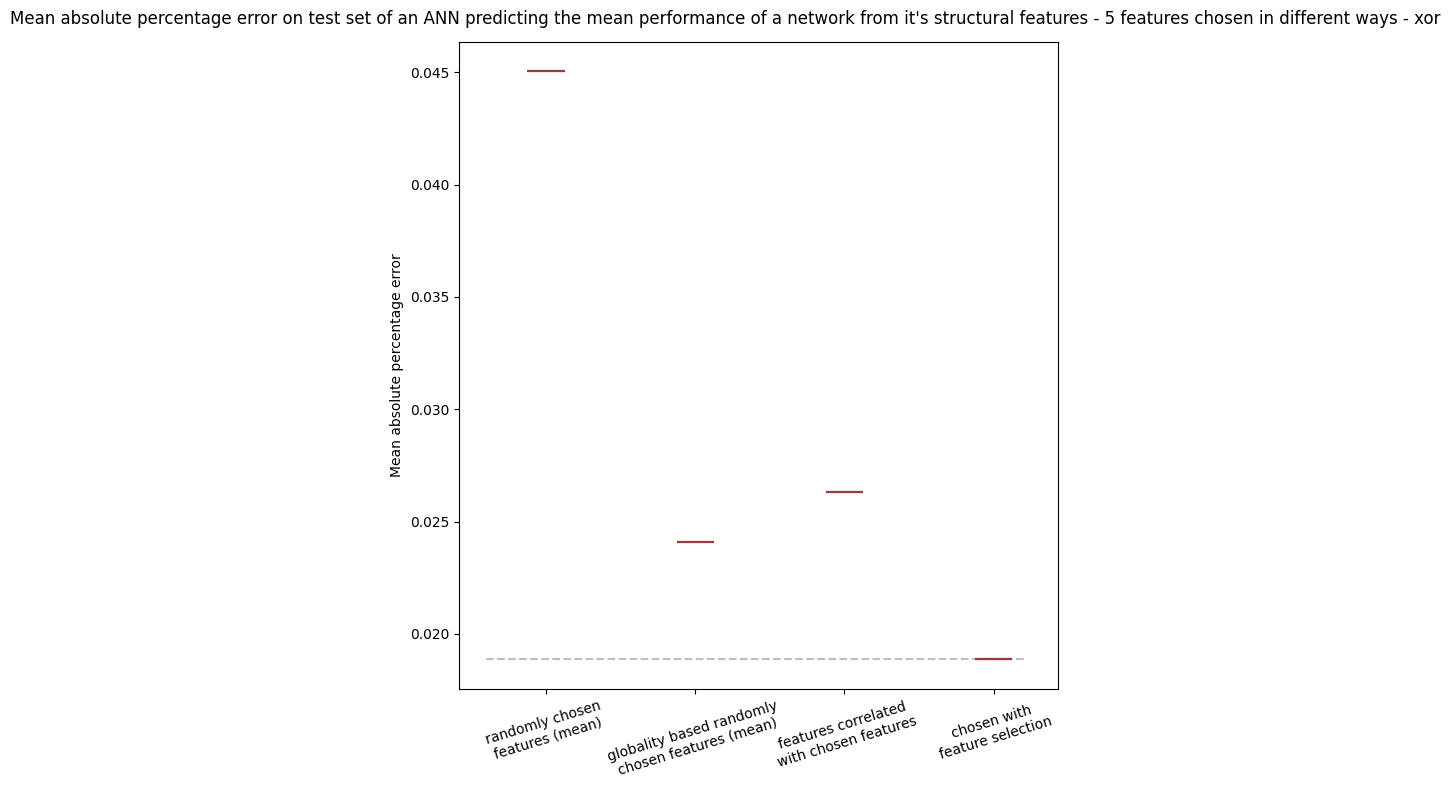

In [33]:
all_data = [
    res_baseline['best mape test'].mean(),
    globality_baseline_res['best mape test'].mean(),
    res_corr['best mape test'],
    feature_selection_res['best mape test'][feature_selection_res['num_features'] == n_features],
]
labels = [
    'randomly chosen\nfeatures (mean)',
    'globality based randomly\nchosen features (mean)',
    'features correlated\nwith chosen features',
    'chosen with\nfeature selection',
]
plt.figure(figsize=(7, 8), )

plt.hlines(y=feature_selection_res['best mape test'][feature_selection_res['num_features'] == n_features], xmin=0.6,
           xmax=len(all_data) + 0.2, colors='grey', linestyles='--', alpha=0.5,
           label='features correlated with chosen features')
parts = plt.violinplot(all_data,
                       vert=True,
                       showmeans=True,
                       # vertical box alignment
                       #labels=labels
                       )
for pc in parts['bodies']:
    pc.set_facecolor(COLORS[2])
for partname in ('cbars', 'cmins', 'cmaxes', 'cmeans'):
    vp = parts[partname]
    vp.set_edgecolor(rads[3])
plt.xticks([y + 1 for y in range(len(all_data))],
           labels=labels, rotation=17, verticalalignment='top', rotation_mode='default')
plt.ylabel(f'Mean absolute percentage error')
plt.suptitle(
    f"Mean absolute percentage error on test set of an ANN predicting the mean performance of a network from it's structural features - {n_features} features chosen in different ways - {task}",
    #loc='center',
    wrap=True)
plt.savefig(f"{plot_path}/{time_str}_mean_differently_chosen_features_{n_features}_features_means.png")
plt.tight_layout()
plt.show()

In [34]:
orignaly_chosen_features_values = pd.read_csv(f"{lgb_res_path}/{n_features}_feature_values.csv").drop("Unnamed: 0",
                                                                                                      axis=1)
originaly_selected_feature_names = list(orignaly_chosen_features_values.columns)[:-1]
correlated_features = pd.read_csv(f"{results_path}/{res_folder}/feature_correlation/{correlated_features_csv_name}",
                                  index_col=0)
corrlated_selected_feature_names =      [
        correlated_features[feature].drop(index=feature).idxmax()
        for feature in originaly_selected_feature_names
    ]

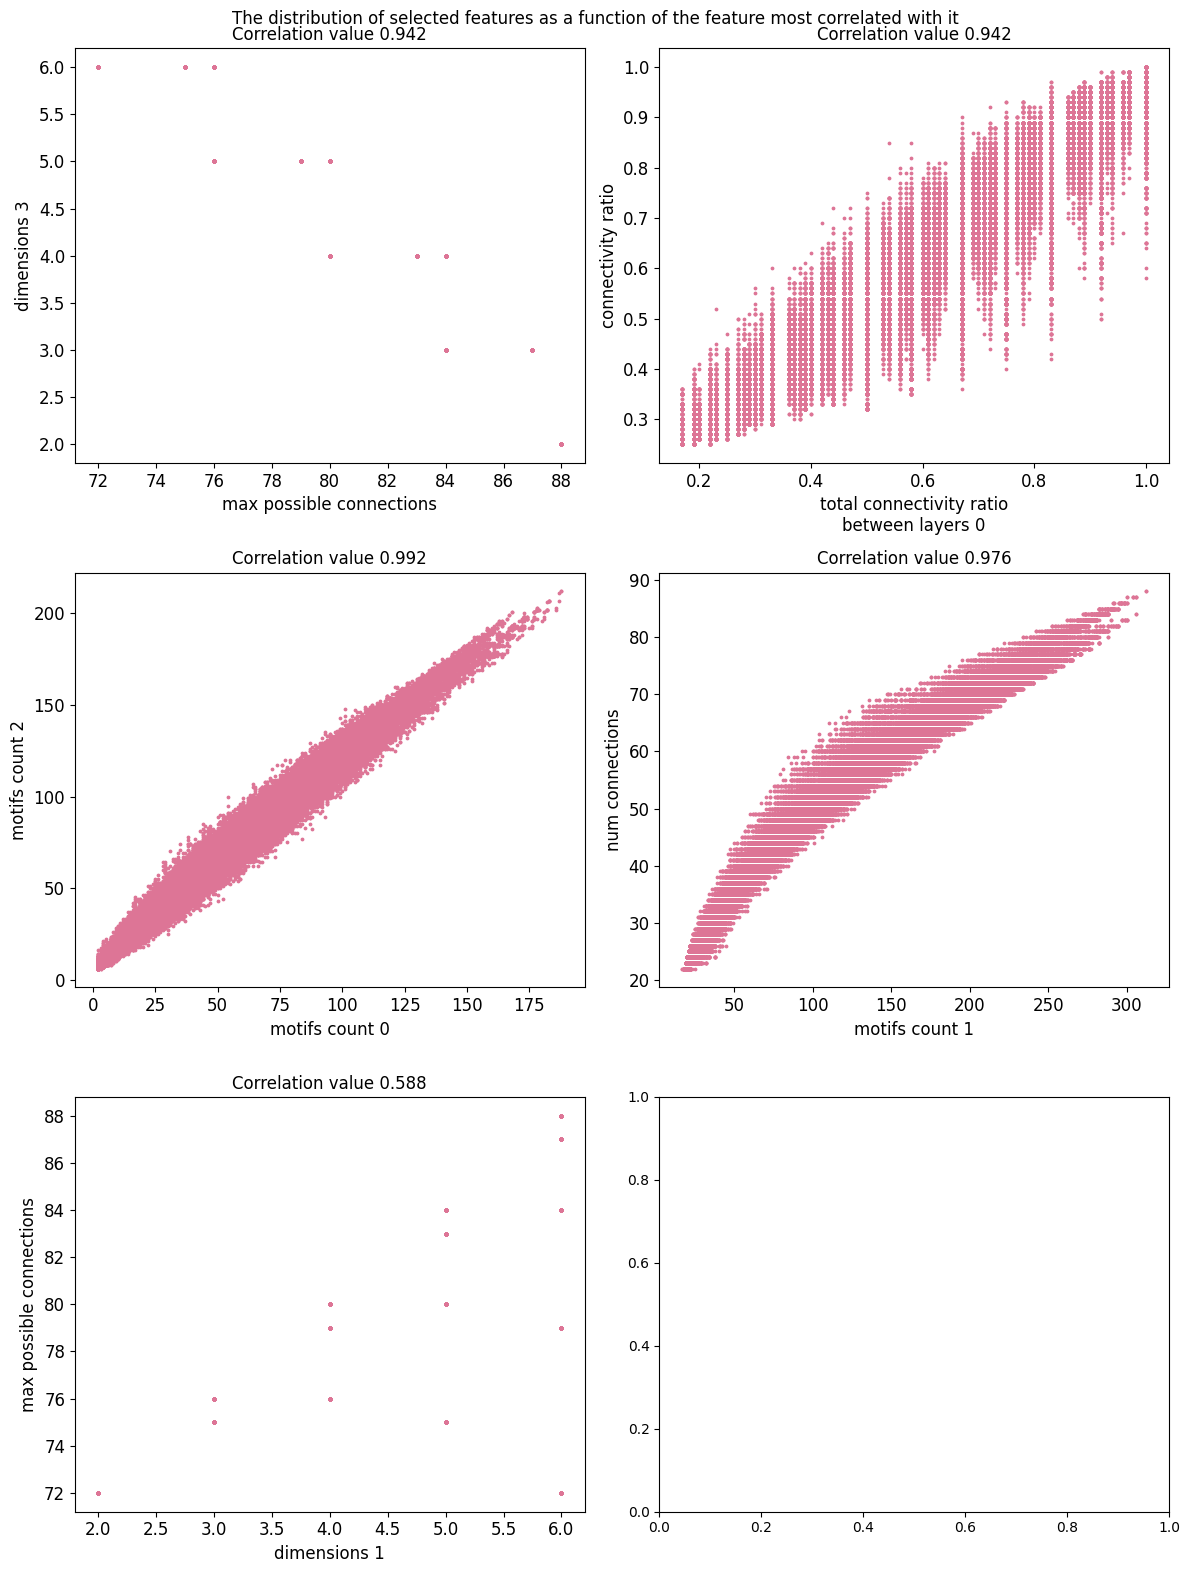

In [35]:
num_columns = int(np.ceil(len(originaly_selected_feature_names) / 2))
fig, axs = plt.subplots(num_columns, 2, figsize=(12, 16), )
min_x = 1.0
max_x = 0
idxs = []
r, c, = axs.shape
for i in range(r):
    for j in range(c):
        idxs.append((i, j))
for k, (origin_f_name, coor_f_name, (i, j)) in enumerate(
        zip(originaly_selected_feature_names, corrlated_selected_feature_names, idxs)):
    correlation_val = round(correlated_features[origin_f_name].loc[coor_f_name], 3)
    axs[i, j].scatter(corrlated_features_values[origin_f_name], corrlated_features_values[coor_f_name],
                      color=COLORS[2], s=3)
    axs[i, j].set_xlabel(textwrap.fill(origin_f_name.replace ('_', ' '), width=30,
                      break_long_words=False), fontsize=12)
    axs[i, j].set_ylabel(textwrap.fill(coor_f_name.replace ('_', ' '), width=30,
                      break_long_words=False), fontsize=12)
    axs[i, j].set_title(f'Correlation value {correlation_val}')
    axs[i, j].tick_params(axis='x', labelsize=12)
    axs[i, j].tick_params(axis='y', labelsize=12)
plt.suptitle(f"The distribution of selected features as a function of the feature most correlated with it")
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_{n_features}_correlated_features_dist.png")
plt.show()

In [36]:
NICE_FEATURES = [
    'connectivity_ratio',
    'num_connections',
    'max_possible_connections',
    'out_connections_per_layer',
    'in_connections_per_layer',
    'total_connectivity_ratio_between_layers',
    'max_connectivity_between_layers_per_layer',
    'layer_connectivity_rank',
    'distances_between_input_neuron',
    'num_paths_to_output_per_input_neuron',
    'num_involved_neurons_in_paths_per_input_neuron',
    'motifs_count',
    'dimensions',
    'num_layers',
    'num_neurons'
]
all_ticks = []
for feature_full_name in correlated_features.columns:
    for feature_general_name in NICE_FEATURES:
        if feature_general_name == 'connectivity_ratio' and feature_general_name !=feature_full_name:
            continue
        if feature_general_name in feature_full_name:
            all_ticks.append(feature_general_name)
labels = []
for name in all_ticks:
    if name not in labels:
        labels.append(name)
texts = []
colors_ = []
for i, tick in enumerate(labels):
    temp = [i for i,val in enumerate(all_ticks) if val==tick]
    tick = tick.replace('connectivity_ratio', 'density').replace('_', ' ')
    if len(temp) == 1:
        texts.append(f"{temp[0]}: {tick}")
    else:
        texts.append(f"{temp[0]} - {temp[-1]}: {tick}")
    for j in range(temp[-1]-temp[0] +1 ):
        colors_.append(COLORS_20[i])

In [ ]:
col = 'Reds'

fig = plt.figure(figsize=(18,12), constrained_layout=True, dpi = 300)
gs = fig.add_gridspec(2, 4)
axs=[]
axs.append( fig.add_subplot(gs[:,3]) )
axs.append( fig.add_subplot(gs[:,0:3]) ) # large subplot (2 rows, 2 columns)
axtxt, ax= axs
c = sns.color_palette(col, as_cmap=True)
ax = sns.heatmap(correlated_features, linewidth=0.5, cmap=c, )
ax.set_xticks(range(0, correlated_features.shape[0], 1))
ax.set_xticklabels(list((range(0, correlated_features.shape[0], 1))))
ax.set_yticks(range(0, correlated_features.shape[0], 1))
ax.set_yticklabels(list((range(0, correlated_features.shape[0], 1))))
for xtick, yticks, color,  in zip(ax.get_xticklabels(),ax.get_yticklabels(), colors_):
    xtick.set_color(color)
    yticks.set_color(color)
axtxt.set_axis_off()
left, width = 0.0, .5
top, height = 0.95, 1
right = left + width
bottom = top- height
for i, (t, c) in enumerate(zip(texts, COLORS_20)):
    axtxt.text(0.5*(left+right), ((top) - i*0.03), t,
        horizontalalignment='left',
        verticalalignment='top',
        fontsize=12, color=c,
      #  transform=axtxt.transAxes,
            )
plt.title(f"{task} - feature correlation (abs)")
plt.savefig(
    f"{plot_path}/{time_str}_{task}_feature_correlation.png")
plt.show()
print('a')




In [ ]:
plt.figure(figsize=(26,24), dpi = 300)
c = sns.color_palette(col, as_cmap=True)
correlated_features_new_name = correlated_features.copy()
correlated_features_new_name.columns = all_ticks
correlated_features_new_name.index = all_ticks
s =sns.clustermap(correlated_features_new_name, linewidth=0.5, cmap=c,cbar_pos=(1,0.21,0.03,0.6,),figsize=(26,24))
s.savefig(
    f"{plot_path}/{time_str}_{task}_feature_correlation_with_clustering.png")
plt.show()